In [1]:
import pandas as pd
df=pd.read_csv('data_cleaned_sales.csv', encoding="cp1252")
print(df.head())

   Unnamed: 0  index             Order ID      Date  \
0           0      0  405-8078784-5731545  04-30-22   
1           1      1  171-9198151-1101146  04-30-22   
2           2      2  404-0687676-7273146  04-30-22   
3           3      3  403-9615377-8133951  04-30-22   
4           4      4  407-1069790-7240320  04-30-22   

                         Status Fulfilment Sales Channel ship-service-level  \
0                     Cancelled   Merchant     Amazon.in           Standard   
1  Shipped - Delivered to Buyer   Merchant     Amazon.in           Standard   
2                       Shipped     Amazon     Amazon.in          Expedited   
3                     Cancelled   Merchant     Amazon.in           Standard   
4                       Shipped     Amazon     Amazon.in          Expedited   

   Category Size Courier Status  Qty currency  Amount    ship-city  \
0   T-shirt    S     On the Way    0      INR  647.62       MUMBAI   
1     Shirt  3XL        Shipped    1      INR  406.00 

In [2]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [3]:
df['Month'] = df['Date'].dt.month

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121143 entries, 0 to 121142
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          121143 non-null  int64         
 1   index               121143 non-null  int64         
 2   Order ID            121143 non-null  object        
 3   Date                121143 non-null  datetime64[ns]
 4   Status              121143 non-null  object        
 5   Fulfilment          121143 non-null  object        
 6   Sales Channel       121143 non-null  object        
 7   ship-service-level  121143 non-null  object        
 8   Category            121143 non-null  object        
 9   Size                121143 non-null  object        
 10  Courier Status      121143 non-null  object        
 11  Qty                 121143 non-null  int64         
 12  currency            121143 non-null  object        
 13  Amount              121143 no

In [5]:
#calculating the total revenue from B2B, B2C and total revenue, using iteration
sumB2B=0
sumnotB2B=0
for index, row in df.iterrows():
    if row['B2B']==True:
        sumB2B += row ['Amount']
    else:
        sumnotB2B+= row ['Amount']
print('The total revenue from B2B:',sumB2B)
print('The total revenue from B2C:',sumnotB2B)
print('Total revenue :',sumB2B+sumnotB2B)

The total revenue from B2B: 591479.79
The total revenue from B2C: 77979068.46000007
Total revenue : 78570548.25000007


In [6]:
print(df.head())


   Unnamed: 0  index             Order ID       Date  \
0           0      0  405-8078784-5731545 2022-04-30   
1           1      1  171-9198151-1101146 2022-04-30   
2           2      2  404-0687676-7273146 2022-04-30   
3           3      3  403-9615377-8133951 2022-04-30   
4           4      4  407-1069790-7240320 2022-04-30   

                         Status Fulfilment Sales Channel ship-service-level  \
0                     Cancelled   Merchant     Amazon.in           Standard   
1  Shipped - Delivered to Buyer   Merchant     Amazon.in           Standard   
2                       Shipped     Amazon     Amazon.in          Expedited   
3                     Cancelled   Merchant     Amazon.in           Standard   
4                       Shipped     Amazon     Amazon.in          Expedited   

   Category Size Courier Status  Qty currency  Amount    ship-city  \
0   T-shirt    S     On the Way    0      INR  647.62       MUMBAI   
1     Shirt  3XL        Shipped    1      INR  4

In [7]:
monthly_sales = df.groupby(['Month'])['Amount'].sum().reset_index()
print(monthly_sales)

   Month       Amount
0      3    101683.85
1      4  28827790.27
2      5  26219850.75
3      6  23421223.38


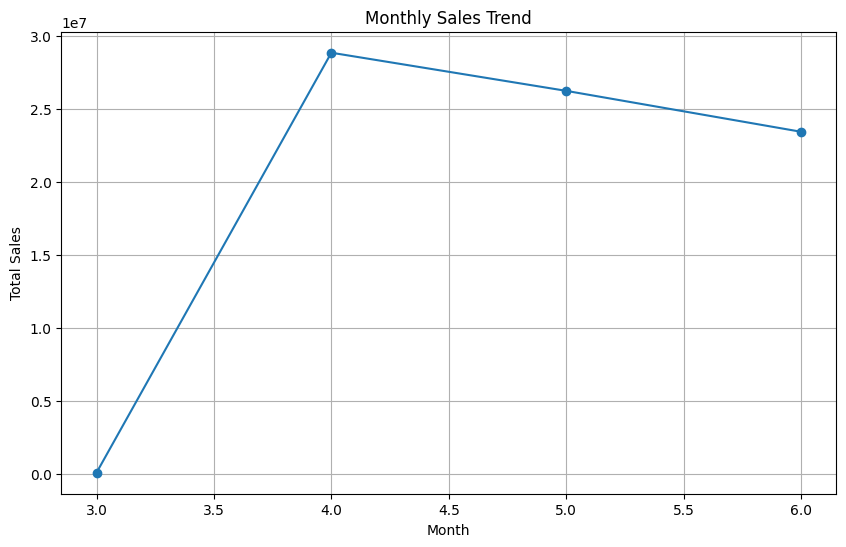

In [8]:
# Plot the monthly sales trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [9]:
daily_sales = df.groupby(['Date'])['Amount'].sum().reset_index()
print(daily_sales)

         Date      Amount
0  2022-03-31   101683.85
1  2022-04-01   865478.60
2  2022-04-02   913101.53
3  2022-04-03  1011763.38
4  2022-04-04   882059.17
..        ...         ...
86 2022-06-25   654234.58
87 2022-06-26   773610.02
88 2022-06-27   714124.67
89 2022-06-28   772085.53
90 2022-06-29   411530.76

[91 rows x 2 columns]


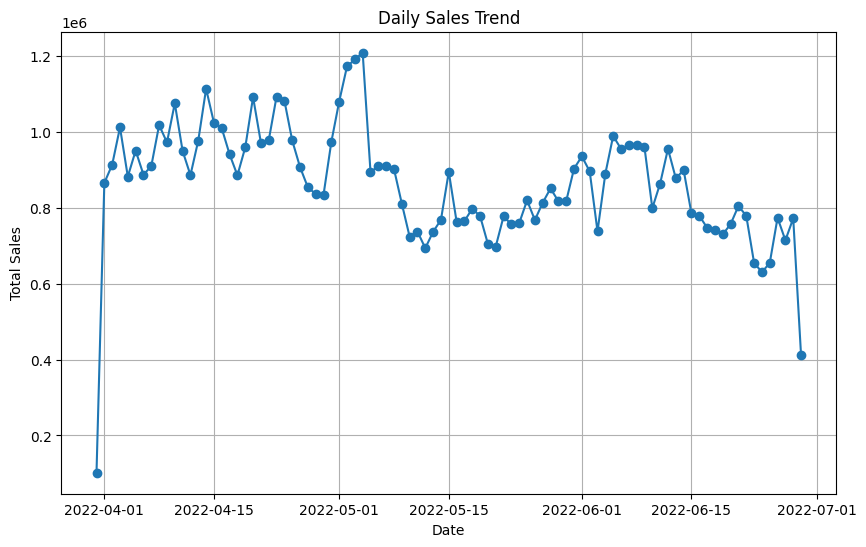

In [10]:
# Plot the daily sales trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

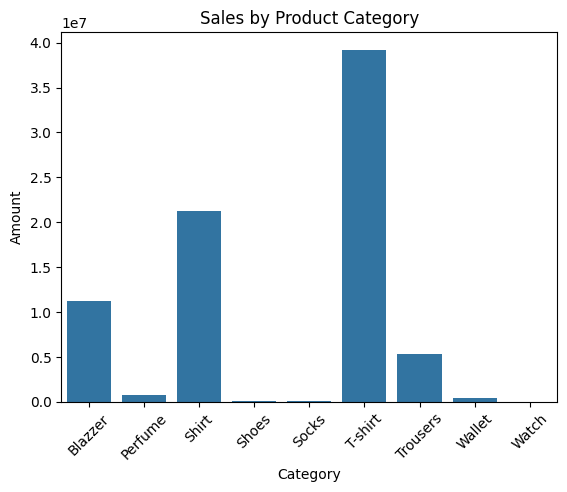

In [11]:
import seaborn as sns

# Sales by Category
sales_by_category = df.groupby('Category')['Amount'].sum().reset_index()

# Plotting
sns.barplot(x='Category', y='Amount', data=sales_by_category)
plt.title('Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

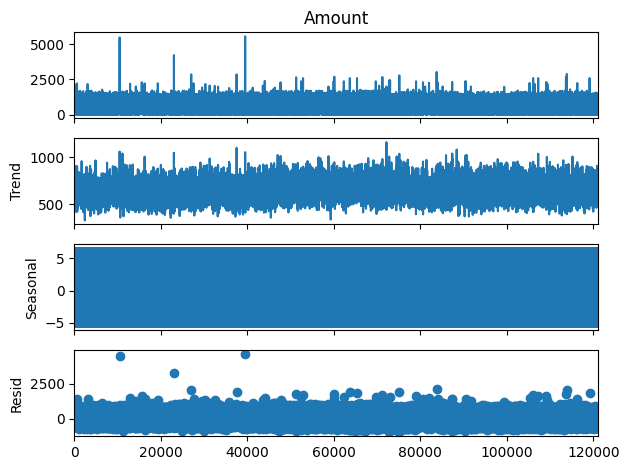

In [14]:
# Calculate Moving Average
df['Sales_MA'] = df['Amount'].rolling(window=3).mean()

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Amount'], model='additive', period=12)
decomposition.plot()
plt.show()
